# AE4320 Assigment: Neural Networks
## Part 1: State & Parameter estimation with F-16 flight data
Author: José Cunha (5216087)

In [1]:
import numpy as np
from read_data import train_data, treat_data, validation_data
from kalman import KalmanFilter
from least_squares import LeastSquares, order_influence
np.random.seed(0)

In [2]:
# load training data
data = train_data()  
Yval, aval, bval = validation_data()
Xval = np.vstack((aval, bval)).T

Apply Kalman Filter. For further details into the implementation, please check `kalman.py`

Observability matrix has full rank, hence system is observable and IEKF will converge.


100%|██████████| 10001/10001 [00:05<00:00, 1801.49it/s]


State estimation complete. The final value of C_alpha_up is:  0.3090879245537496


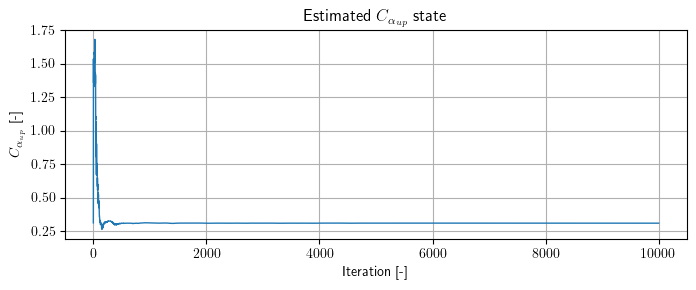

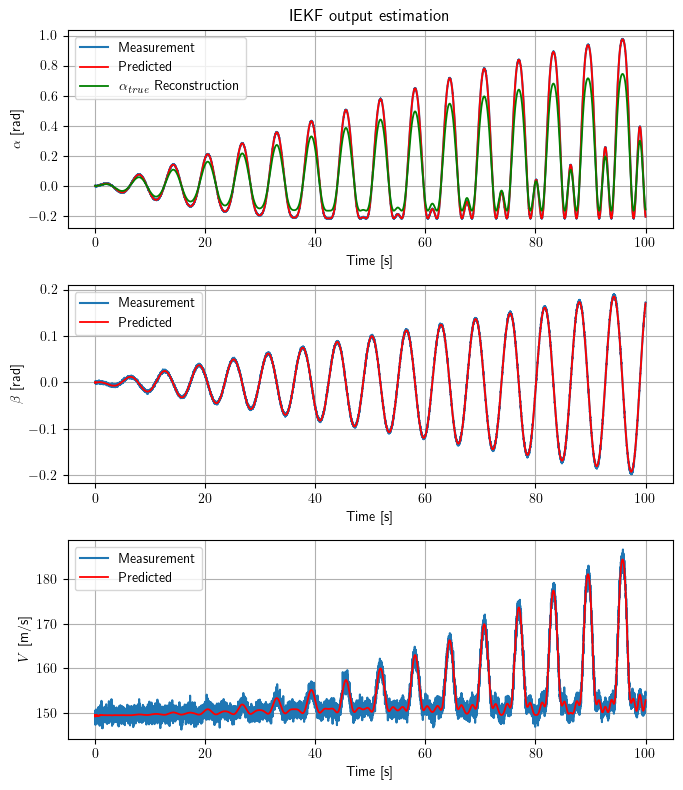

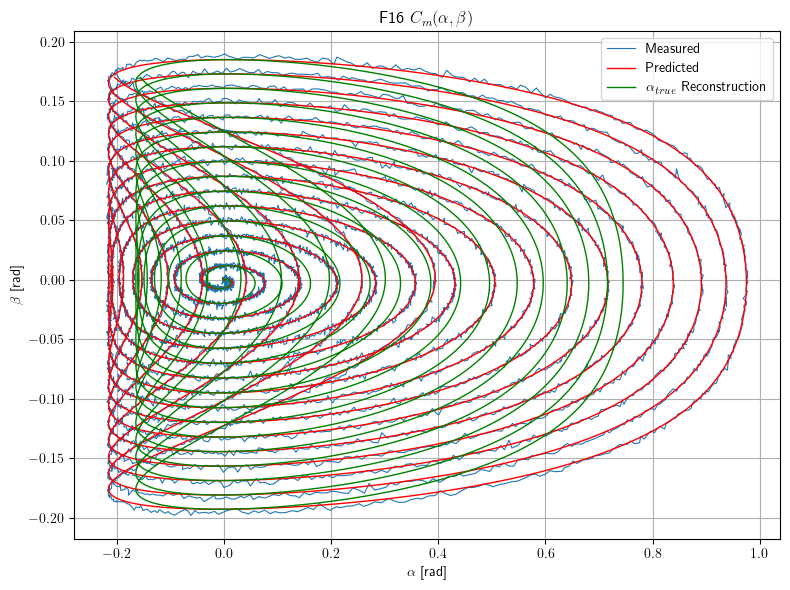

In [3]:
KF = KalmanFilter(dt=0.01, data=data, n_states=4)  # initialize object
KF.prove_convergence()  # check rank of observability matrix
KF.IEKF()  # perform Iterative Extended Kalman Filter
KF.plot()  # plot results

Apply Least Squares Estimation. For further details into the implementation, please check `least_squares.py`

Load the relevant data and OLS hyperparameters

In [4]:
ols_data = np.loadtxt('data/output.csv', delimiter=',')  # load full reconstructed data
Y, X = ols_data[:, 0], ols_data[:, 1:]
Ytreat, Xtreat = treat_data((Y, X)) # remove glitched data

order = 6   # polynomial order

First see the influence of the sensor glitch on the estimation

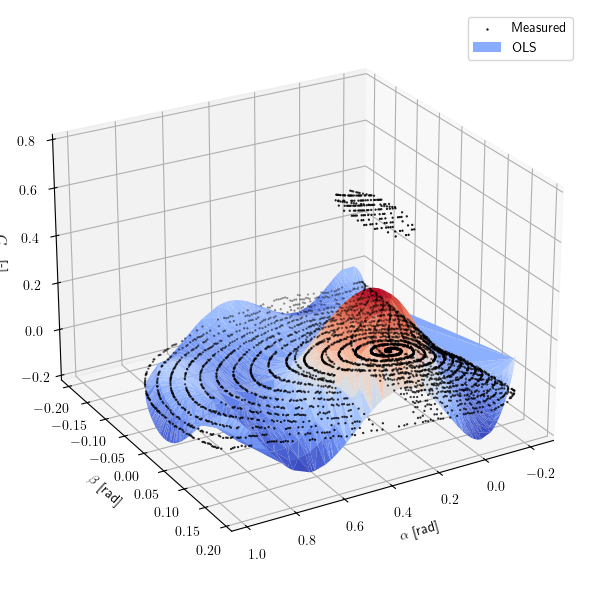

In [5]:
LS_glitched = LeastSquares(data=(Y, X), order=order)  # initialize object
yhat_glitched = LS_glitched.OLS()

LeastSquares.plot_regression(LS_glitched.Xtrain, LS_glitched.Ytrain, yhat_glitched, lims=(-0.2, 0.8))

Remove glitched data and re-estimate the parameters. This is done for the three different sets of data: training, validation and special validation sets.

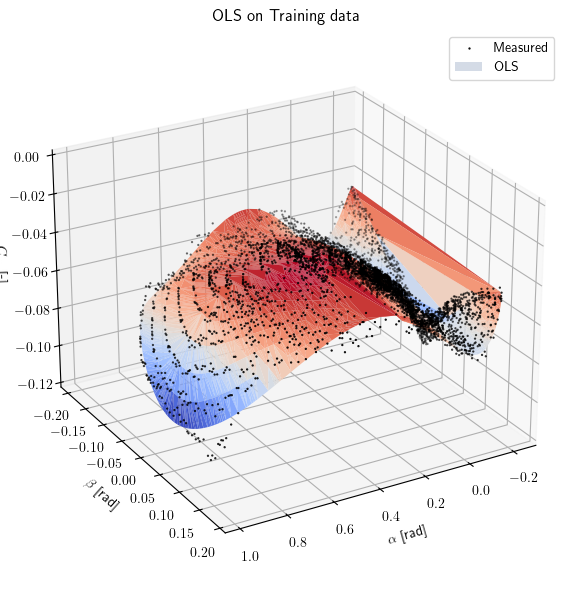

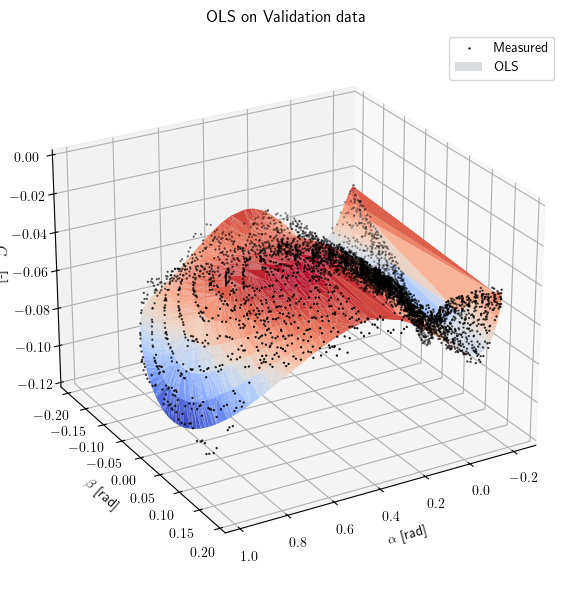

In [6]:
LS = LeastSquares(data=(Ytreat, Xtreat), order=order)  # initialize object
yhat_train = LS.OLS()
yhat_val = LS.OLS_predict_on_val_data()
yhat_special = LS.OLS_predict_on_val_data()

# plot OLS results
LeastSquares.plot_regression(LS.Xtrain, LS.Ytrain, yhat_train, lims=(-0.12, 0), title='OLS on Training data')
LeastSquares.plot_regression(LS.Xval, LS.Yval, yhat_val, lims=(-0.12, 0), title='OLS on Validation data')

Show the influence of the polynomial model order on the accuracy of fit.

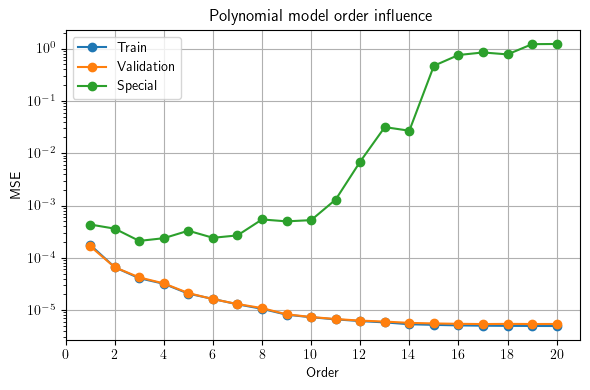

In [7]:
order_influence(data=(Ytreat, Xtreat), validation_set=(Yval, Xval))

Statistical validation of the model

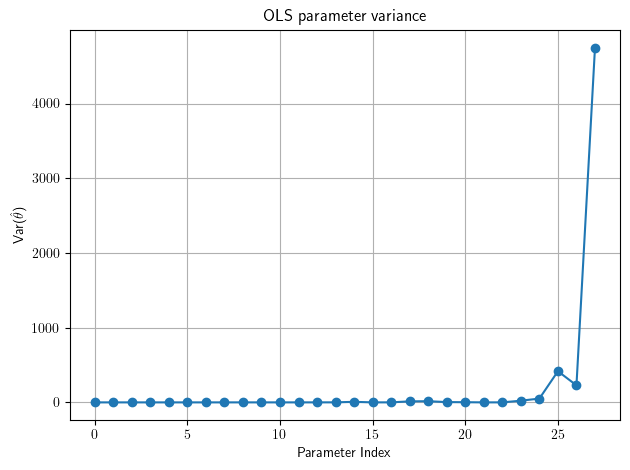

In [8]:
LS.statistical_validation(yhat_val)

Model-error-based validation of the model

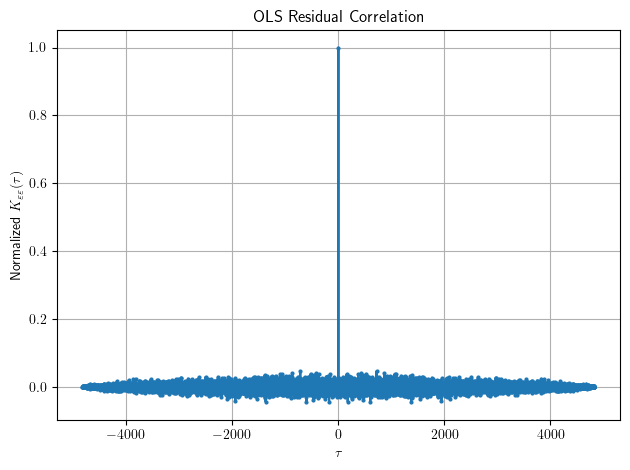

In [11]:
LS.residual_validation(yhat_val)